In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestRegressor

In [2]:
df=pd.read_csv("Company_Data.csv")

In [3]:
df

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


In [4]:
df=df.drop({'ShelveLoc','Age','Education','Urban','US'},axis=1)

In [5]:
df.head()

,Sales,CompPrice,Income,Advertising,Population,Price
0,9.50,138,73,11,276,120
1,11.22,111,48,16,260,83
2,10.06,113,35,10,269,80
3,7.40,117,100,4,466,97
4,4.15,141,64,3,340,128


<AxesSubplot:>

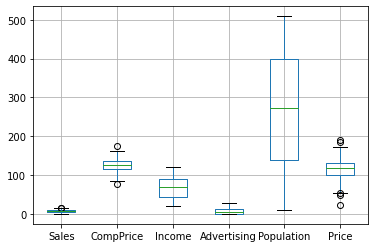

In [6]:
df.boxplot()

array([[<AxesSubplot:title={'center':'Sales'}>,
        <AxesSubplot:title={'center':'CompPrice'}>],
       [<AxesSubplot:title={'center':'Income'}>,
        <AxesSubplot:title={'center':'Advertising'}>],
       [<AxesSubplot:title={'center':'Population'}>,
        <AxesSubplot:title={'center':'Price'}>]], dtype=object)

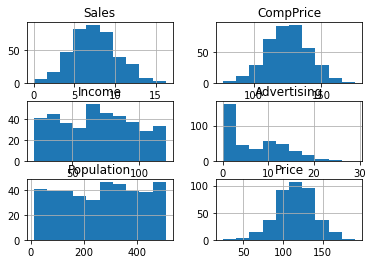

In [7]:
df.hist()

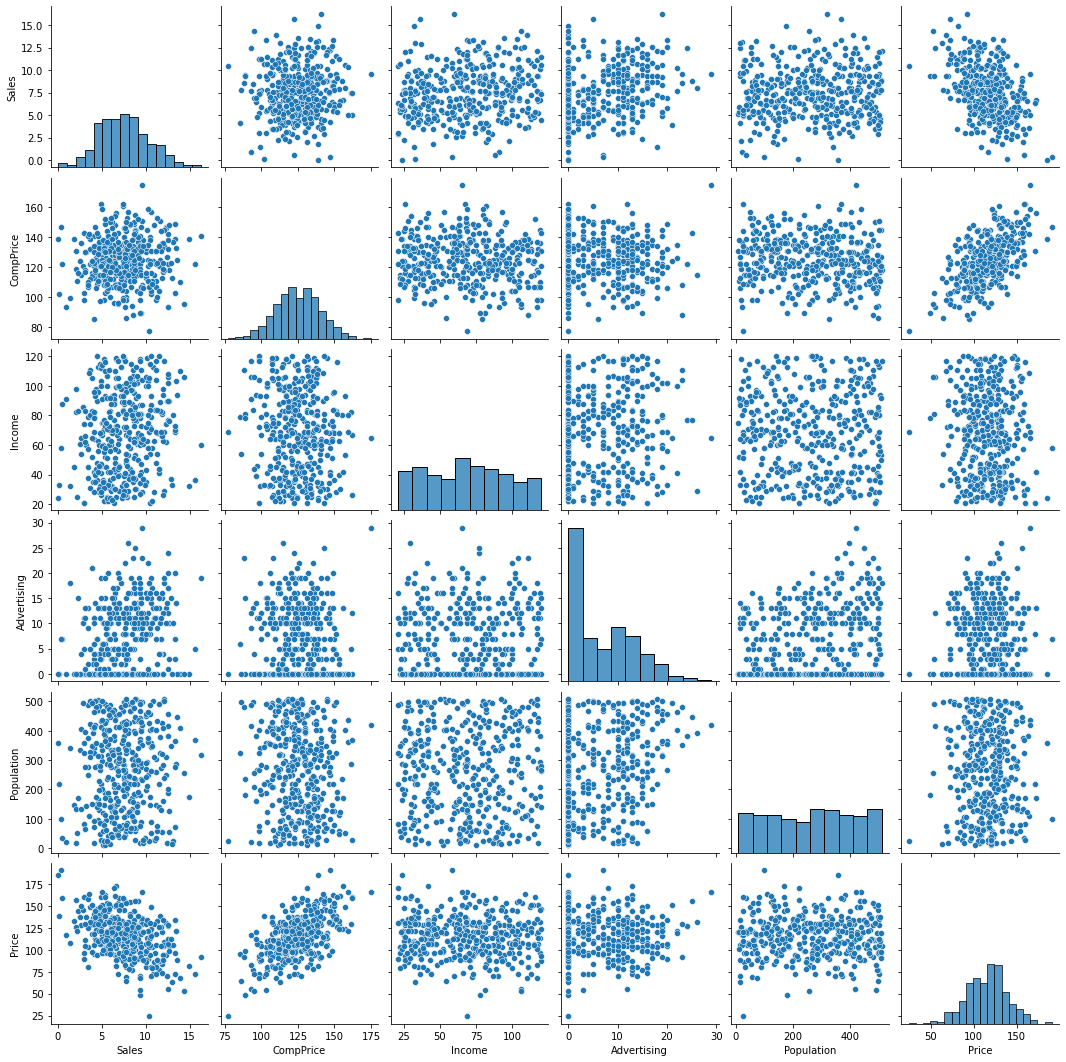

In [8]:
sns.pairplot(df)
plt.show()

In [9]:
df[df.duplicated()].shape

(0, 6)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
dtypes: float64(1), int64(5)
memory usage: 18.9 KB


In [11]:
df.describe()

,Sales,CompPrice,Income,Advertising,Population,Price
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000


In [12]:
x=df.iloc[:,0:7]
y=df['Sales']

In [13]:
x

,Sales,CompPrice,Income,Advertising,Population,Price
0,9.50,138,73,11,276,120
1,11.22,111,48,16,260,83
2,10.06,113,35,10,269,80
3,7.40,117,100,4,466,97
4,4.15,141,64,3,340,128
...,...,...,...,...,...,...
395,12.57,138,108,17,203,128
396,6.14,139,23,3,37,120
397,7.41,162,26,12,368,159
398,5.94,100,79,7,284,95


In [14]:
y

0       9.50
1      11.22
2      10.06
3       7.40
4       4.15
       ...  
395    12.57
396     6.14
397     7.41
398     5.94
399     9.71
Name: Sales, Length: 400, dtype: float64

In [15]:
colnames=list(df.columns)
colnames

['Sales', 'CompPrice', 'Income', 'Advertising', 'Population', 'Price']

In [16]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y, test_size=0.2,random_state=40)

In [17]:
num_tress=100
max_features=3
kfold=KFold(n_splits=10)
model=RandomForestRegressor(n_estimators=num_tress,max_features=max_features)

In [18]:
model.fit(x_train,y_train)

RandomForestRegressor(max_features=3)

In [19]:
model.score(x_train,y_train)

0.9973069456438446